# Anak Data FGD Case Study I

**Description:**
Analisa penjualan Merchant Y, dan rekomendasi untuk meningkatkan sales.

---

In [11]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load and Describe Data

## Load Data

In [12]:
trx = pd.read_excel('~/Downloads/Data FGD Batch II #001.xlsx', sheet_name='data')
cust = pd.read_excel('~/Downloads/Data FGD Batch II #001.xlsx', sheet_name='customer')

In [13]:
trx.head()

,ID_TRANSAKSI,CUSTOMER_ID,ID_LINE_ITEM,ITEM_CODE,NAMA_ITEM,KATEGORI,QTY,HARGA,TOTAL,TANGGAL,DURASI_PERSIAPAN,METODE_PEMBAYARAN
0,2,C_4,1,2,LEMON TEA,MINUMAN,1,8000,8000,2020-11-02,3,CASH
1,2,C_4,2,8,COOKIES COCO,MAKANAN,2,3000,6000,2020-11-02,3,CASH
2,3,C_38,3,5,ES CENDOL,MINUMAN,1,10000,10000,2020-11-02,6,CASH
3,8,C_27,4,10,ROTI BUN,MAKANAN,2,3000,6000,2020-11-02,8,OVO
4,8,C_27,5,11,KUE LAPIS,MAKANAN,4,2500,10000,2020-11-02,8,OVO


In [14]:
cust.head()

,CUSTOMER_ID,REGISTRATION_DATE,BORN_DATE,GENDER,REGION,SUBDISTRICT
0,C_911,2020-08-20,1995-05-31,M,South Jakarta,Setiabudi
1,C_430,2020-08-04,1997-04-06,F,South Jakarta,Cilandak
2,C_23,2020-05-27,1992-10-28,M,South Jakarta,Cilandak
3,C_90,2020-07-01,1994-12-22,F,South Jakarta,Pasar Minggu
4,C_819,2020-06-24,1984-10-11,F,South Jakarta,Cilandak


In [15]:
#join trx and cust data

data = trx.merge(cust, on='CUSTOMER_ID', how='left')
data.head()

,ID_TRANSAKSI,CUSTOMER_ID,ID_LINE_ITEM,ITEM_CODE,NAMA_ITEM,KATEGORI,QTY,HARGA,TOTAL,TANGGAL,DURASI_PERSIAPAN,METODE_PEMBAYARAN,REGISTRATION_DATE,BORN_DATE,GENDER,REGION,SUBDISTRICT
0,2,C_4,1,2,LEMON TEA,MINUMAN,1,8000,8000,2020-11-02,3,CASH,2020-06-15,2001-03-23,F,South Jakarta,Setiabudi
1,2,C_4,2,8,COOKIES COCO,MAKANAN,2,3000,6000,2020-11-02,3,CASH,2020-06-15,2001-03-23,F,South Jakarta,Setiabudi
2,3,C_38,3,5,ES CENDOL,MINUMAN,1,10000,10000,2020-11-02,6,CASH,2020-08-02,1993-02-17,F,South Jakarta,Pasar Minggu
3,8,C_27,4,10,ROTI BUN,MAKANAN,2,3000,6000,2020-11-02,8,OVO,2020-04-29,1999-03-15,M,South Jakarta,Cilandak
4,8,C_27,5,11,KUE LAPIS,MAKANAN,4,2500,10000,2020-11-02,8,OVO,2020-04-29,1999-03-15,M,South Jakarta,Cilandak


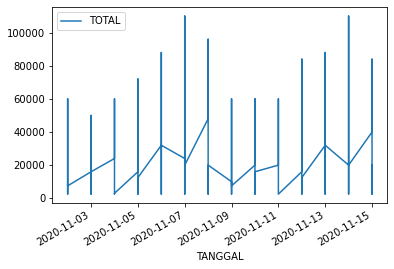

In [16]:
data[['TANGGAL','TOTAL']].set_index('TANGGAL').plot()

In [17]:
data['month'] = pd.DatetimeIndex(data['TANGGAL']).month
data.head()

,ID_TRANSAKSI,CUSTOMER_ID,ID_LINE_ITEM,ITEM_CODE,NAMA_ITEM,KATEGORI,QTY,HARGA,TOTAL,TANGGAL,DURASI_PERSIAPAN,METODE_PEMBAYARAN,REGISTRATION_DATE,BORN_DATE,GENDER,REGION,SUBDISTRICT,month
0,2,C_4,1,2,LEMON TEA,MINUMAN,1,8000,8000,2020-11-02,3,CASH,2020-06-15,2001-03-23,F,South Jakarta,Setiabudi,11
1,2,C_4,2,8,COOKIES COCO,MAKANAN,2,3000,6000,2020-11-02,3,CASH,2020-06-15,2001-03-23,F,South Jakarta,Setiabudi,11
2,3,C_38,3,5,ES CENDOL,MINUMAN,1,10000,10000,2020-11-02,6,CASH,2020-08-02,1993-02-17,F,South Jakarta,Pasar Minggu,11
3,8,C_27,4,10,ROTI BUN,MAKANAN,2,3000,6000,2020-11-02,8,OVO,2020-04-29,1999-03-15,M,South Jakarta,Cilandak,11
4,8,C_27,5,11,KUE LAPIS,MAKANAN,4,2500,10000,2020-11-02,8,OVO,2020-04-29,1999-03-15,M,South Jakarta,Cilandak,11


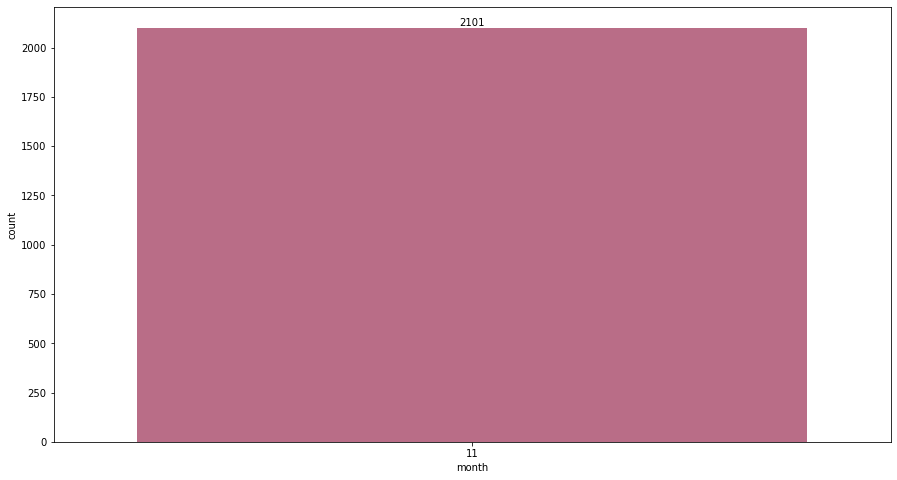

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize = (15, 8))
graph = sns.countplot('month', data=data, color='#c56183', order=data['month'].value_counts().index)
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

## Describe Data

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2101 entries, 0 to 2100
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID_TRANSAKSI       2101 non-null   int64         
 1   CUSTOMER_ID        2101 non-null   object        
 2   ID_LINE_ITEM       2101 non-null   int64         
 3   ITEM_CODE          2101 non-null   int64         
 4   NAMA_ITEM          2101 non-null   object        
 5   KATEGORI           2101 non-null   object        
 6   QTY                2101 non-null   int64         
 7   HARGA              2101 non-null   int64         
 8   TOTAL              2101 non-null   int64         
 9   TANGGAL            2101 non-null   datetime64[ns]
 10  DURASI_PERSIAPAN   2101 non-null   int64         
 11  METODE_PEMBAYARAN  2101 non-null   object        
 12  REGISTRATION_DATE  2101 non-null   datetime64[ns]
 13  BORN_DATE          2101 non-null   datetime64[ns]
 14  GENDER  

# Exploratory Data Analysis

## Statistika Deskriptif

In [20]:
data_num = data.select_dtypes(include=['int64', 'float64'])
data_cat = data.select_dtypes(include=['object'])
data_num.columns, data_cat.columns 

(Index(['ID_TRANSAKSI', 'ID_LINE_ITEM', 'ITEM_CODE', 'QTY', 'HARGA', 'TOTAL',
        'DURASI_PERSIAPAN', 'month'],
       dtype='object'),
 Index(['CUSTOMER_ID', 'NAMA_ITEM', 'KATEGORI', 'METODE_PEMBAYARAN', 'GENDER',
        'REGION', 'SUBDISTRICT'],
       dtype='object'))

In [21]:
data_num.describe()

,ID_TRANSAKSI,ID_LINE_ITEM,ITEM_CODE,QTY,HARGA,TOTAL,DURASI_PERSIAPAN,month
count,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.000000,2101.0
mean,570.174203,1079.053784,6.557830,3.144217,6744.883389,21244.407425,5.499286,11.0
std,327.674195,639.906509,3.407011,1.794874,3470.539789,17694.076851,1.847682,0.0
min,2.000000,1.000000,1.000000,1.000000,2500.000000,2500.000000,2.000000,11.0
25%,283.000000,526.000000,4.000000,2.000000,3000.000000,9000.000000,4.000000,11.0
50%,551.000000,1051.000000,6.000000,3.000000,8000.000000,15000.000000,5.000000,11.0
75%,870.000000,1633.000000,9.000000,4.000000,10000.000000,30000.000000,7.000000,11.0
max,1087.000000,2214.000000,12.000000,11.000000,12000.000000,110000.000000,13.000000,11.0


In [22]:
data_cat.describe()

,CUSTOMER_ID,NAMA_ITEM,KATEGORI,METODE_PEMBAYARAN,GENDER,REGION,SUBDISTRICT
count,2101,2101,2101,2101,2101,2101,2101
unique,335,12,2,3,2,1,7
top,C_158,MILK TEA BOBA,MINUMAN,CASH,M,South Jakarta,Tebet
freq,22,199,1237,757,1214,2101,498


## Univariate Analysis

### Numerical Data

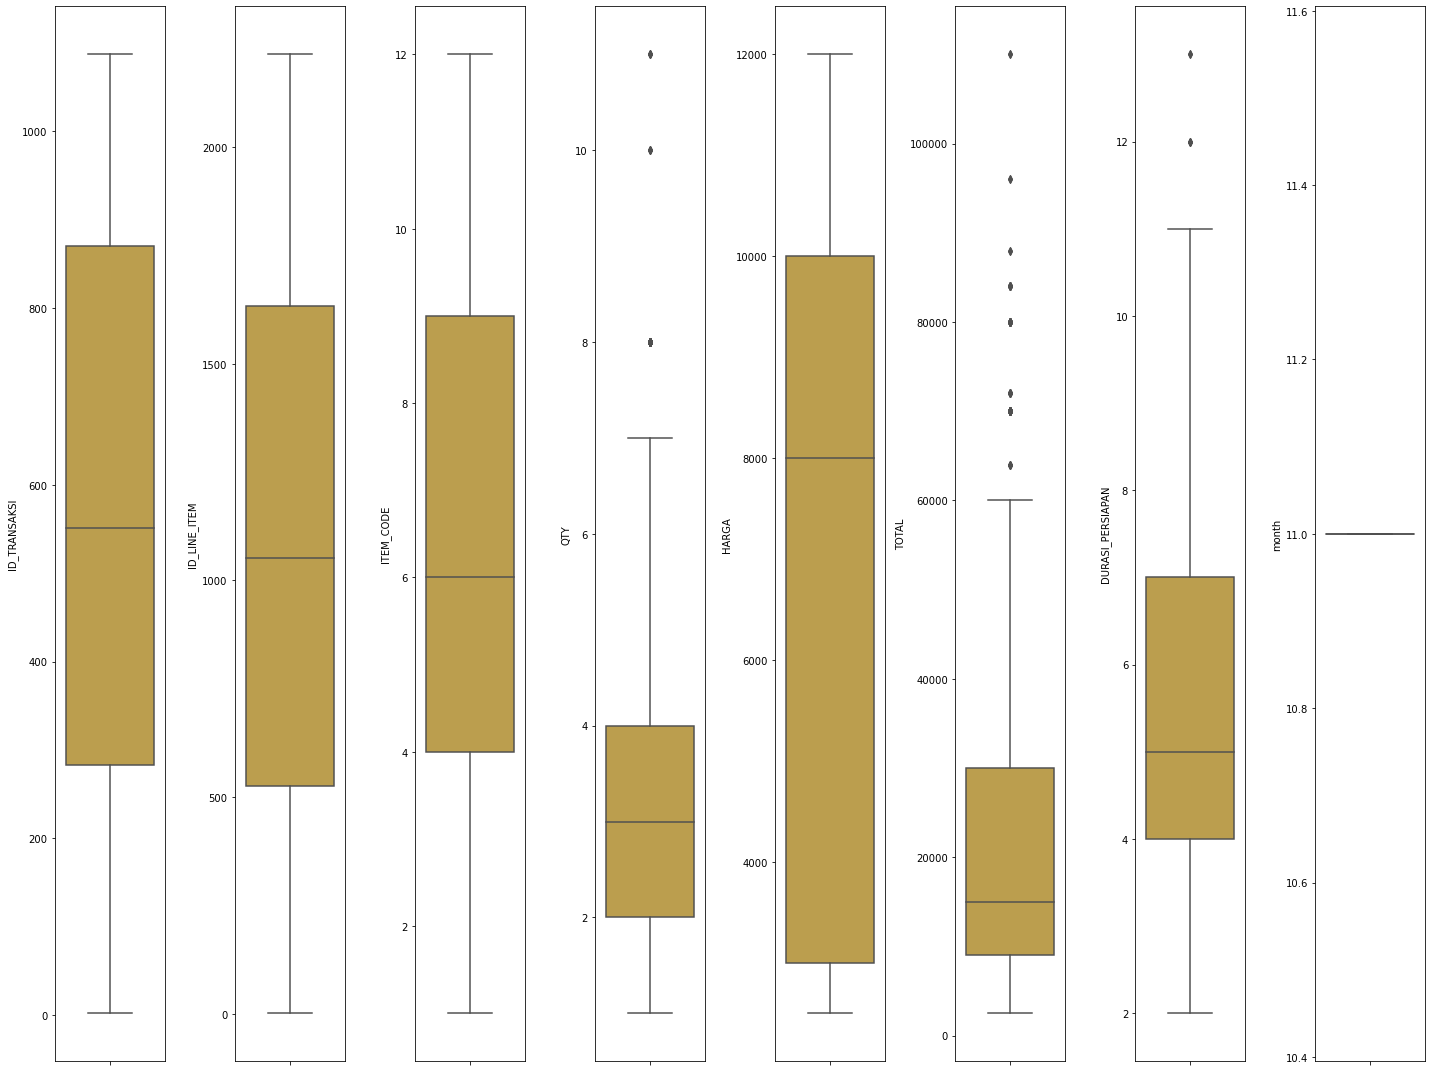

In [35]:
plt.figure(figsize=(25, 15))
for i in range(0, len(data_num.columns)):
    plt.subplot(1, 10, i+1)
    sns.boxplot(data[data_num.columns[i]],orient='v', color='#cda63c')
    plt.tight_layout()

Dari chart di atas, terlihat bahwa ada beberapa features yang mempunyai outlier yaitu QTY, TOTAL dan DURASI_PERSIAPAN

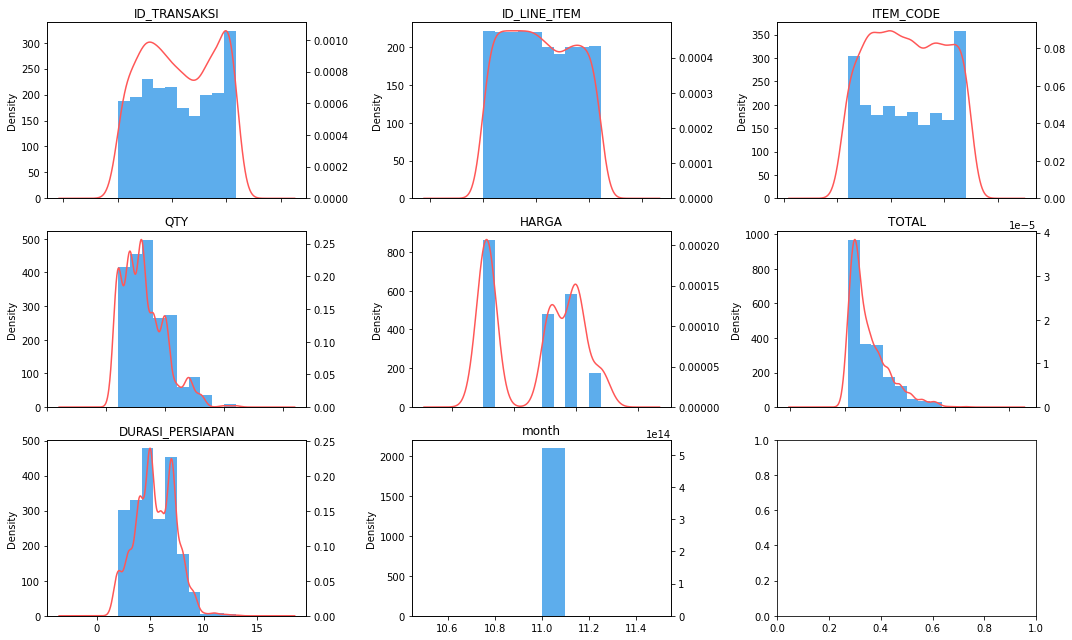

In [24]:
k = len(data_num.columns)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(data_num.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax, color='#5dadec')
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name, color='#ff5757')
    ax2.set_ylim(0)

fig.tight_layout()

### Categorical Data

In [25]:
data_cat_unique = data_cat.nunique().reset_index()
data_cat_unique.columns = ['feature', 'unique value']
data_cat_unique = data_cat_unique.sort_values('unique value', ascending=False)
data_cat_unique

,feature,unique value
0,CUSTOMER_ID,335
1,NAMA_ITEM,12
6,SUBDISTRICT,7
3,METODE_PEMBAYARAN,3
2,KATEGORI,2
4,GENDER,2
5,REGION,1


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

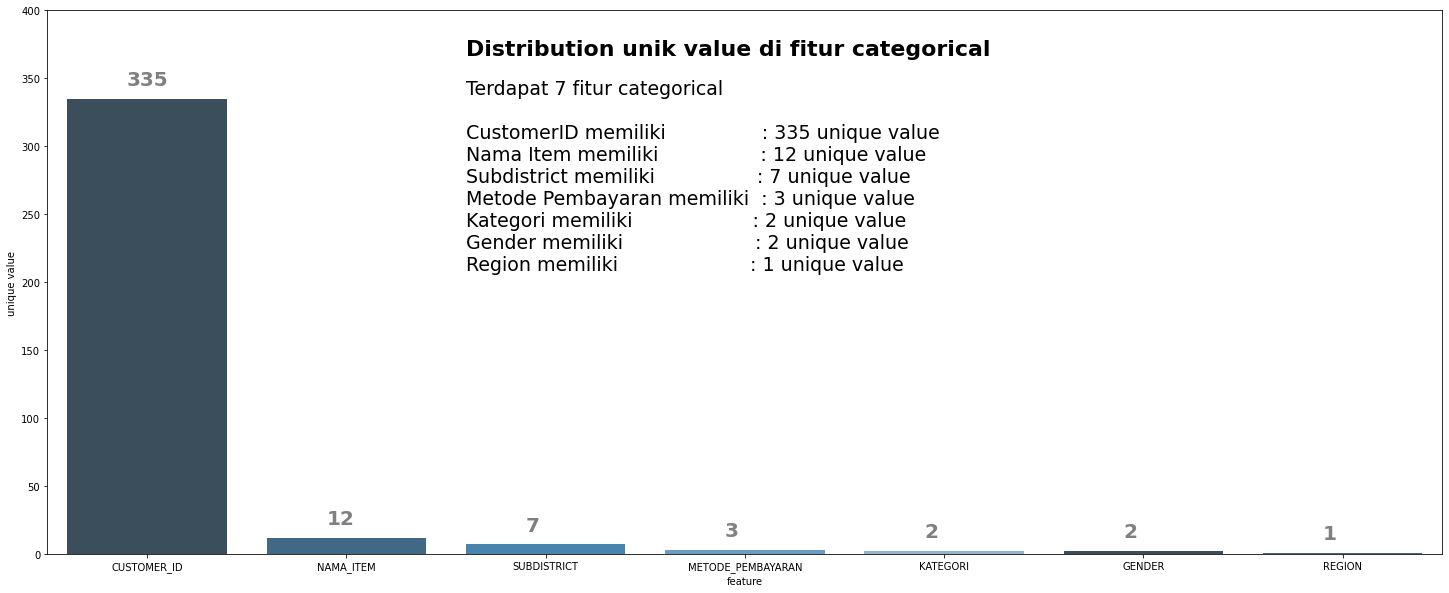

In [26]:
fig, ax = plt.subplots(figsize=(25,10))

g = sns.barplot(x = 'feature',y='unique value',data=data_cat_unique,ax=ax, 
               palette=sns.color_palette("Blues_d", n_colors=5, desat=1))

x = np.arange(len(data_cat_unique['feature']))
y = data_cat_unique['unique value']

for i, v in enumerate(y):
    ax.text(x[i]- 0.1, v+10, str(v), fontsize = 20, color='gray', fontweight='bold')
    
title = '''
Distribution unik value di fitur categorical
'''
ax.text(1.6,350,title,horizontalalignment='left',color='black',fontsize=22,fontweight='bold')
    

text = '''
Terdapat 7 fitur categorical

CustomerID memiliki                : 335 unique value
Nama Item memiliki                 : 12 unique value
Subdistrict memiliki                 : 7 unique value
Metode Pembayaran memiliki  : 3 unique value
Kategori memiliki                    : 2 unique value
Gender memiliki                      : 2 unique value
Region memiliki                      : 1 unique value


''' 
ax.text(1.6,160,text,horizontalalignment='left',color='black',fontsize=19,fontweight='normal')
    
ax.set_ylim(0,400)

ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.tight_layout

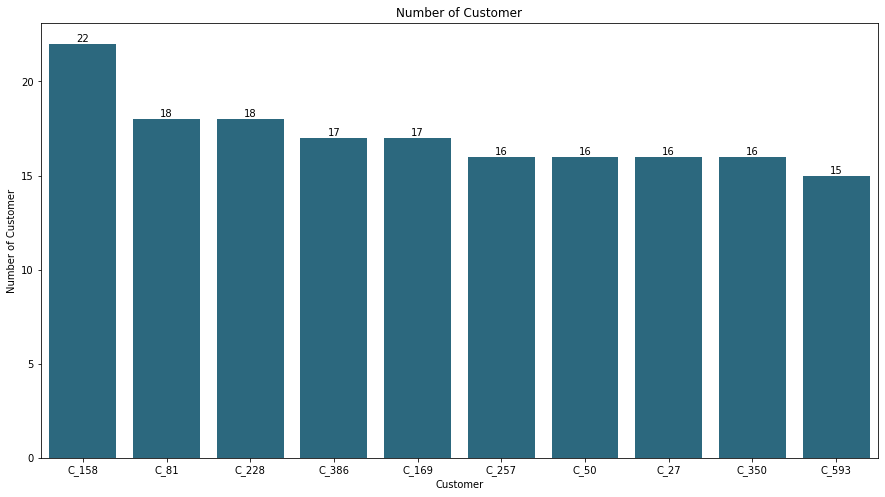

In [27]:
plt.figure(figsize = (15, 8))
graph = sns.countplot(x='CUSTOMER_ID', data=data_cat, order = data_cat['CUSTOMER_ID'].value_counts().iloc[:10].index, color='#1f6f8b')
plt.title('Number of Customer')
plt.ylabel('Number of Customer')
plt.xlabel('Customer')
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

Customer yang melakuan pembelian terbanyak adalah Customer **C_158** yaitu sebanyak **22 kali.**

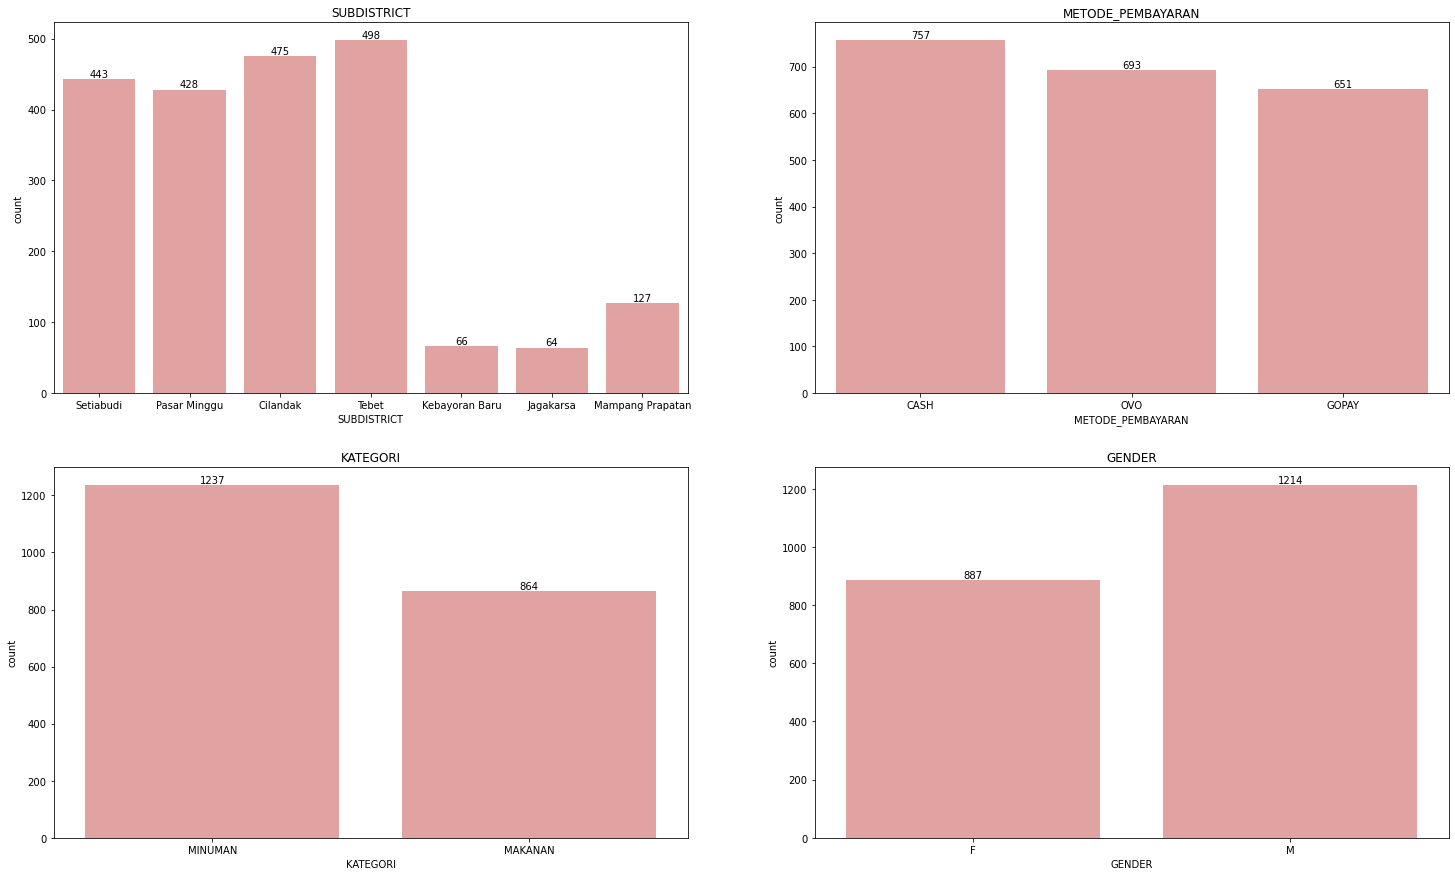

In [28]:
data_cat_new = ['SUBDISTRICT', 'METODE_PEMBAYARAN', 'KATEGORI', 'GENDER']

plt.figure(figsize=(25, 15))
for i in range(0, len(data_cat_new)):
    plt.subplot(2, 2, i+1)
    graph = sns.countplot(data[data_cat_new[i]], data=data, color='#ea9a96')
    plt.title(data_cat_new[i])
    for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
        
      

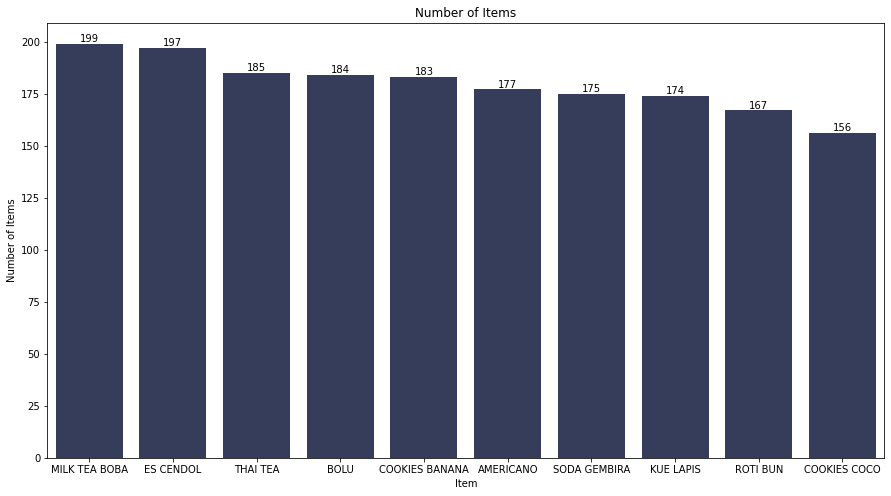

In [29]:
plt.figure(figsize = (15, 8))
graph = sns.countplot(x='NAMA_ITEM', data=data_cat, order = data_cat['NAMA_ITEM'].value_counts().iloc[:10].index, color='#303960')
plt.title('Number of Items')
plt.ylabel('Number of Items')
plt.xlabel('Item')
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')

---

## Multivariate Analysis

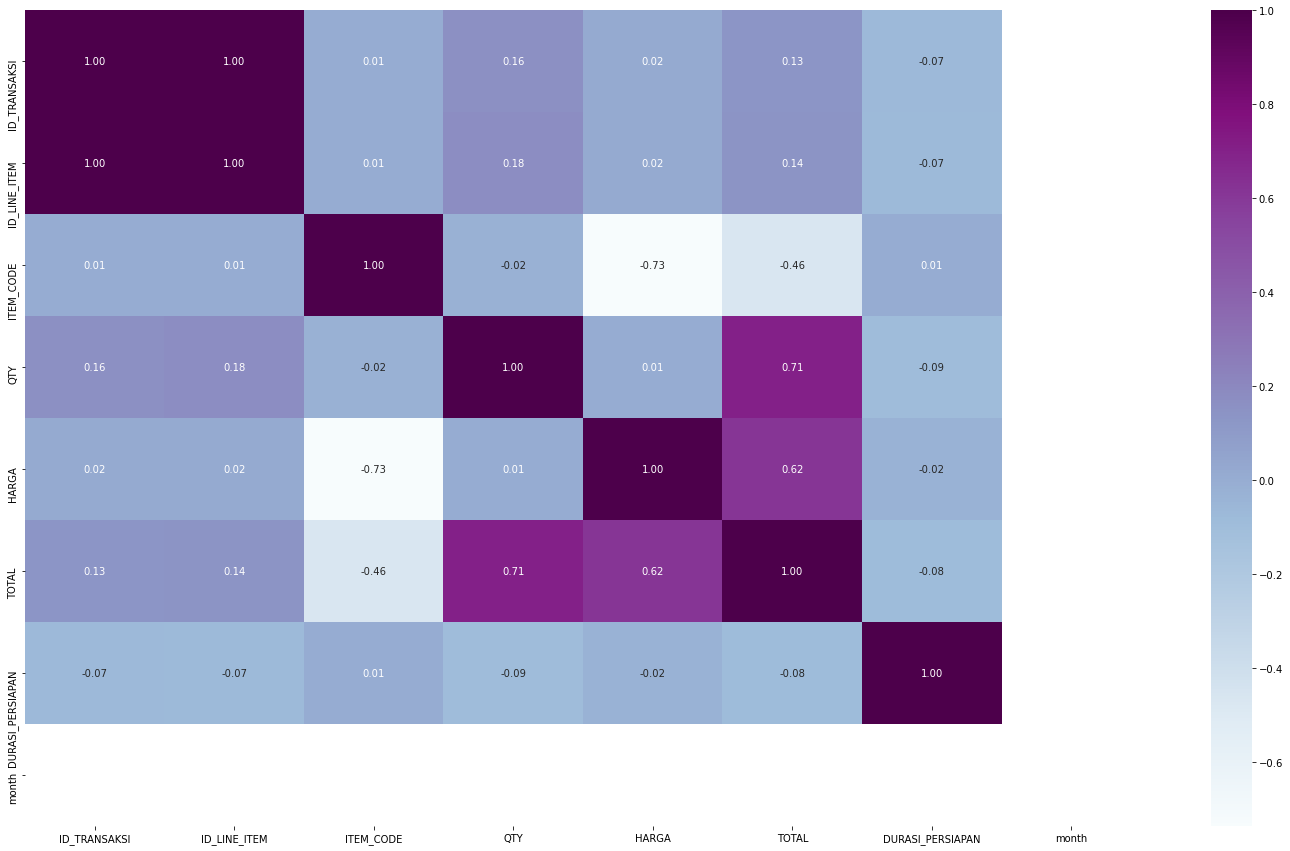

In [30]:
corr_= data[data_num.columns].corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

Dari heatmap di atas didapatkan:
- Feature QTY dan TOTAL berkorelasi kuat secara positif kuat (0.71)
- Feature ITEM_CODE dan HARGA berkorelasi kuat secara negatif kuat (-0.73)
- Feature ID_LINE_ITEM dan ID_TRANSAKSI mempunyai nilai korelasi 1 sehingga feature tersebut dapat dipilih salah satu saja karena redundan.

In [31]:
df_agg = data.groupby(['ITEM_CODE', 'NAMA_ITEM','HARGA'])['QTY'].sum().reset_index()
df_agg

,ITEM_CODE,NAMA_ITEM,HARGA,QTY
0,1,KOPI SUSU,8000,448
1,2,LEMON TEA,8000,482
2,3,MILK TEA BOBA,10000,669
3,4,AMERICANO,8000,603
4,5,ES CENDOL,10000,592
5,6,SODA GEMBIRA,12000,555
6,7,THAI TEA,10000,553
7,8,COOKIES COCO,3000,519
8,9,COOKIES BANANA,3000,563
9,10,ROTI BUN,3000,539


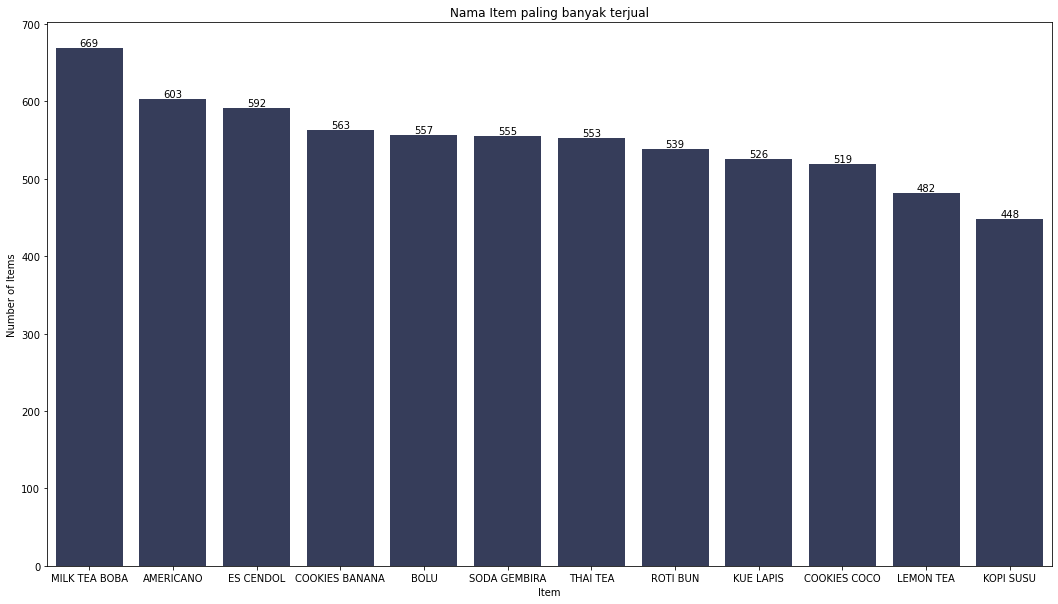

In [32]:
plt.figure(figsize = (18, 10))
graph = sns.barplot(x='NAMA_ITEM', y='QTY', data=df_agg, color='#303960', 
                    order=df_agg.sort_values('QTY', ascending = False).NAMA_ITEM)
plt.title('Nama Item paling banyak terjual')
plt.ylabel('Number of Items')
plt.xlabel('Item')
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
     

Dari bar chart di atas, **Milk Tea Boba** menjadi item favorit dengan terjual sebanyak **10%**. Dan **Kopi Susu** menjadi item terendah yang terjual yaitu sebanyak **7%**

---

In [33]:
sales = data.groupby(['ITEM_CODE', 'NAMA_ITEM','HARGA'])['TOTAL'].sum().reset_index()
sales

,ITEM_CODE,NAMA_ITEM,HARGA,TOTAL
0,1,KOPI SUSU,8000,3584000
1,2,LEMON TEA,8000,3856000
2,3,MILK TEA BOBA,10000,6690000
3,4,AMERICANO,8000,4824000
4,5,ES CENDOL,10000,5920000
5,6,SODA GEMBIRA,12000,6660000
6,7,THAI TEA,10000,5530000
7,8,COOKIES COCO,3000,1557000
8,9,COOKIES BANANA,3000,1689000
9,10,ROTI BUN,3000,1617000


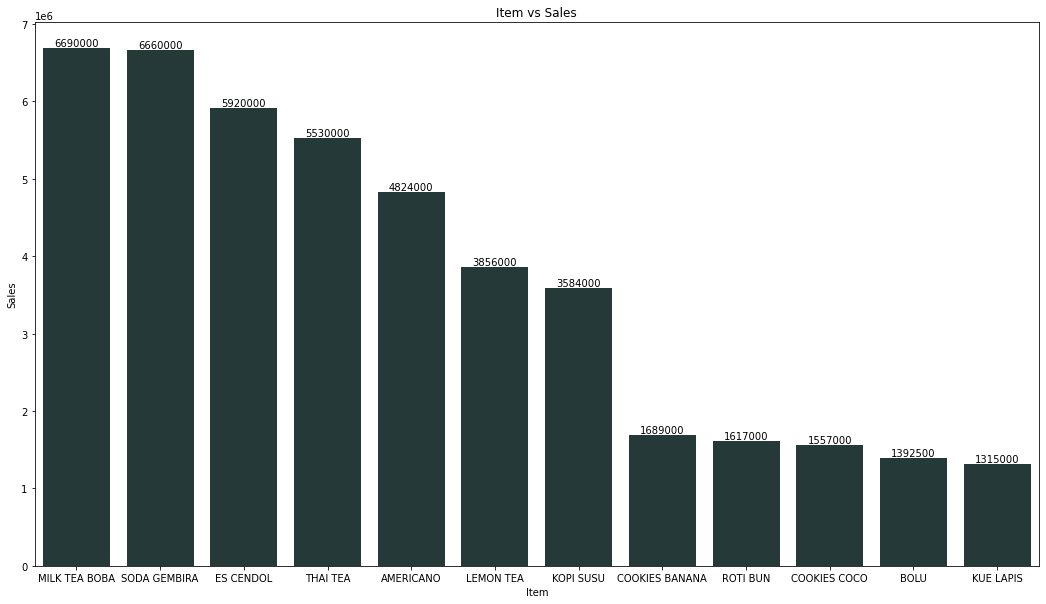

In [38]:
plt.figure(figsize = (18, 10))
graph = sns.barplot(x='NAMA_ITEM', y='TOTAL', data=sales, color='#213e3b', 
                    order=sales.sort_values('TOTAL', ascending = False).NAMA_ITEM)
plt.title('Item vs Sales')
plt.ylabel('Sales')
plt.xlabel('Item')
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
     

Sejalan dengan jumlah item yang terjual, **Milk Tea Boba** menyumbang sales terbanyak yaitu sebesar **15%**. Sedangkan **Kopi Susu** sebagai item paling sedikit yang terjual, sudah menyumbang sebesar **8%**

Oleh karena itu, kita dapat mengoptimalkan penjualan Kopi Susu. Kita dapat menambahkan variasi atau topping pada Kopi Susu original, yaitu topping Boba atau Marie Regal.

----